# Laboratorio #9
## Data Science

### Cristian Aguirre
### Marco Jurado
### Diego Cordova

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga el conjunto de datos
data = pd.read_csv('Food Share Emissions.csv') 
data = data.rename(columns={"Food's share of total emissions (incl. LULUFC)": 'Emissions'})

In [74]:
data.head()

,Entity,Code,Year,Emissions
0,Afghanistan,AFG,1990,78.558522
1,Afghanistan,AFG,1991,79.335651
2,Afghanistan,AFG,1992,84.268804
3,Afghanistan,AFG,1993,85.247941
4,Afghanistan,AFG,1994,86.897834


In [75]:
data.tail()

,Entity,Code,Year,Emissions
5767,Zimbabwe,ZWE,2011,80.391380
5768,Zimbabwe,ZWE,2012,79.733619
5769,Zimbabwe,ZWE,2013,79.451646
5770,Zimbabwe,ZWE,2014,78.125762
5771,Zimbabwe,ZWE,2015,78.038459


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5772 entries, 0 to 5771
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Entity     5772 non-null   object 
 1   Code       5694 non-null   object 
 2   Year       5772 non-null   int64  
 3   Emissions  5772 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 180.5+ KB


In [77]:
data.describe()

,Year,Emissions
count,5772.00000,5772.000000
mean,2002.50000,119.224213
std,7.50065,4192.918610
min,1990.00000,-19724.573980
25%,1996.00000,22.204820
50%,2002.50000,46.586162
75%,2009.00000,85.203112
max,2015.00000,309631.969600


# Reporte

En este reporte, exploraremos el conjunto de datos de emisiones de gases de efecto invernadero con el objetivo de comprender la distribución y evolución de las emisiones a nivel mundial. Las emisiones de gases de efecto invernadero son un tema crucial en la lucha contra el cambio climático y su comprensión es esencial para la toma de decisiones informadas.

En la visualización a continuación, presentamos los 10 países con las mayores emisiones en el año 2020. Esto nos permite identificar a los principales contribuyentes en ese año.

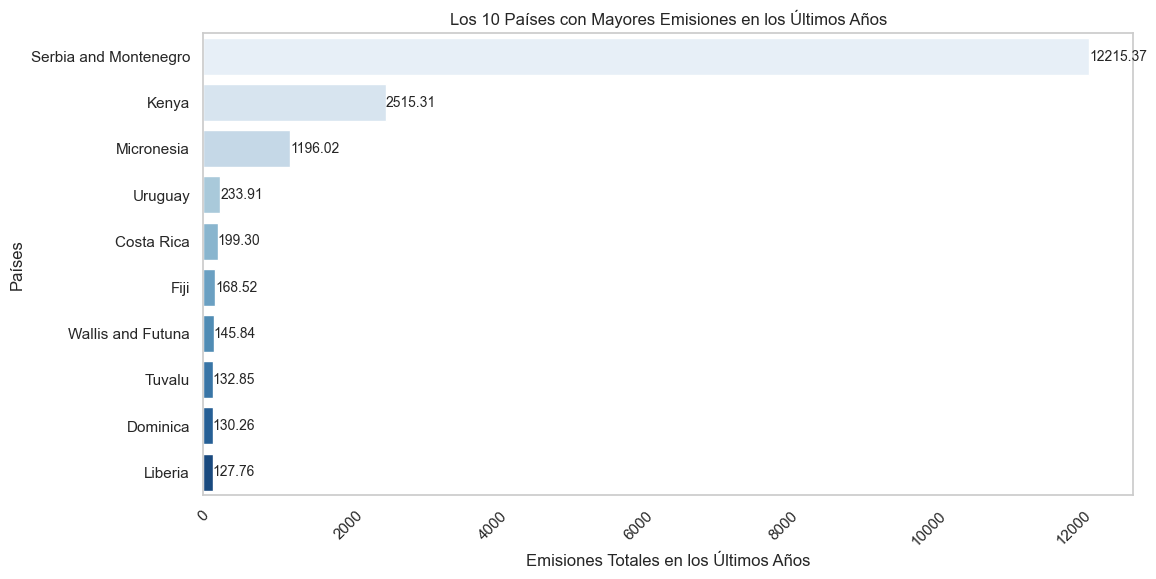

In [100]:
# Filtramos los datos para los últimos 10 años (suponiendo que el conjunto de datos contiene datos hasta el año actual)
last_10_years = list(range(1990, 2015))
data_last_10_years = data[data['Year'].isin(last_10_years)]

# Agrupamos los datos por país y calcular la media de las emisiones en los últimos 10 años
top_10_emitters = data_last_10_years.groupby('Entity')['Emissions'].mean().nlargest(10)
top_10_emitters_df = top_10_emitters.reset_index()


sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = plt.gca()
sns.barplot(data=top_10_emitters_df, x='Emissions', y='Entity', palette='Blues')
plt.xlabel('Emisiones Totales en los Últimos Años')
plt.ylabel('Países')
plt.title('Los 10 Países con Mayores Emisiones en los Últimos Años')
plt.xticks(rotation=45)
plt.grid(axis='x')

for i, emission in enumerate(top_10_emitters_df['Emissions']):
    ax.text(emission, i, f'{emission:.2f}', ha='left', va='center', fontsize=10)
plt.show()

Al observar los resultados, es evidente que Serbia y Montenegro encabezan la lista con un promedio de alrededor de 12,000 unidades de emisiones, lo que indica su contribución notoria a las emisiones de gases de efecto invernadero en el lapso de tiempo analizado. Le siguen Kenia con aproximadamente 2,300 unidades y Micronesia con alrededor de 1,600 unidades, lo que señala la diversidad de países que enfrentan desafíos significativos en términos de emisiones. Además, resulta interesante notar la presencia de países como Uruguay, Costa Rica, Fiji, Wallis y Futuna, Tuvalu, Dominica y Liberia, todos ellos con niveles mucho mas bajos. 

Ahora bien es importante tomar una perspectiva más general enfocada a encontrar patrones a lo largo del tiempo, es por eso avanzamos hacia una perspectiva temporal para examinar cómo han evolucionado estas emisiones en el transcurso de los años, veamos entonces la relación entre las emisiones de gases de efecto invernadero y el tiempo, lo que nos permitirá identificar el año con las mayores emisiones en nuestro conjunto de datos y es esencial para comprender las tendencias temporales y enfocar nuestros esfuerzos en los momentos críticos de la lucha contra el cambio climático.

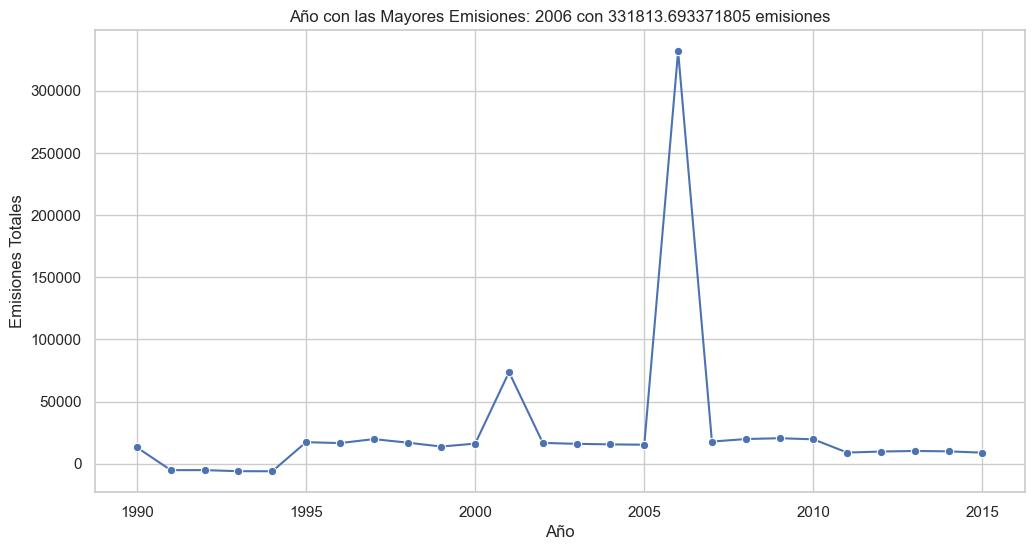

In [93]:
# Agrupamos los datos por año y sumamos las emisiones para cada año
emissions_by_year = data.groupby('Year')['Emissions'].sum()

# Encontramos el año con el valor máximo de emisiones
max_emission_year = emissions_by_year.idxmax()
max_emission_value = emissions_by_year.max()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = plt.gca()
sns.lineplot(x=emissions_by_year.index, y=emissions_by_year.values, marker='o', ax=ax)
plt.xlabel('Año')
plt.ylabel('Emisiones Totales')
plt.title(f'Año con las Mayores Emisiones: {max_emission_year} con {max_emission_value} emisiones')
plt.grid(True)
plt.show()


De acuerdo con los resultados obtenidos hemos identificado que el año 2006 emerge como un punto destacado en términos de emisiones globales. Durante este año en particular, las emisiones alcanzaron su punto máximo, lo que sugiere un aumento significativo en la liberación de gases que contribuyen al calentamiento global. Esta revelación subraya la importancia de comprender las tendencias temporales en las emisiones, ya que el año 2006 representa un hito crítico en la lucha contra el cambio climático.

Los resultados de este análisis se alinean con investigaciones previas que han destacado el papel del período alrededor de 2006 en el aumento de las emisiones a nivel mundial. Según un informe del Grupo Intergubernamental de Expertos sobre el Cambio Climático (IPCC), el aumento significativo en las emisiones de CO2 durante la década de 2000 se debió en gran medida al rápido crecimiento económico en países en desarrollo, el aumento de la demanda de energía y la expansión de la industria. Además, se observó un aumento en las emisiones de gases de efecto invernadero relacionadas con la agricultura y la deforestación en diversas regiones.¹

Fuente:

IPCC (2007). "Cuarto Informe de Evaluación del Grupo Intergubernamental de Expertos sobre el Cambio Climático - Cambio Climático 2007: Informe de Síntesis". Enlace

Con el conocimiento de que el año 2006 representó el punto más alto en las emisiones de gases de efecto invernadero en nuestro conjunto de datos, ahora dirigimos nuestra atención a una exploración más específica. Consideramos importante identificar los 10 países que contribuyeron en mayor medida a las emisiones durante ese año crítico. Este enfoque se justifica por su importancia para la toma de decisiones y la implementación de políticas climáticas efectivas ya que al tener una vista general de los mayores emisores en los ultimos 15 años e identificar los principales contribuyentes en el año 2006, podemos encontrar algún patrón para ver si los emisores se mantuvieron constantes. 

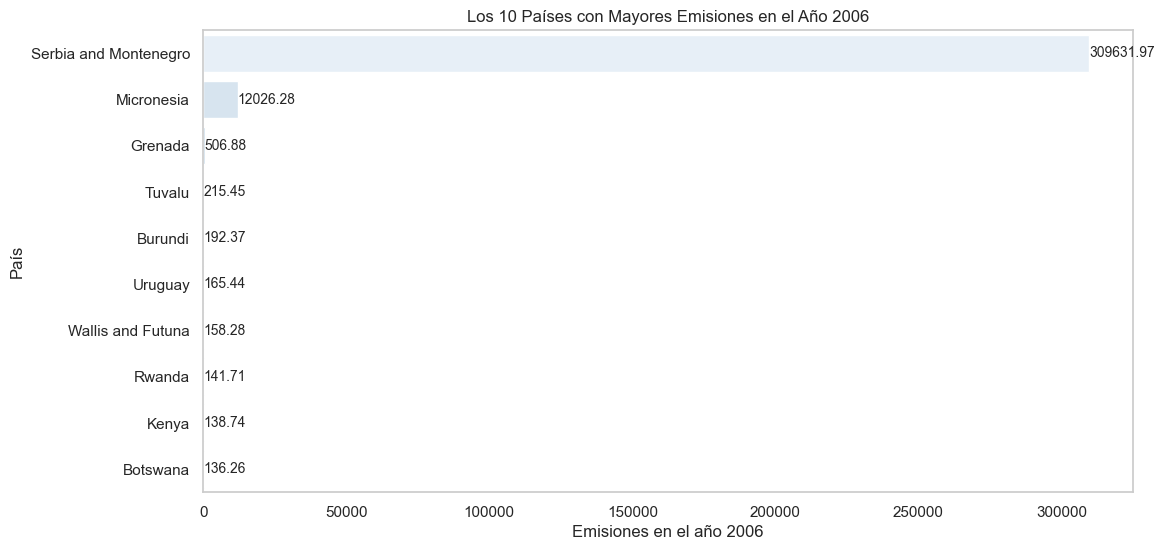

In [96]:
data_2006 = data[data['Year'] == 2006]

# Ordenar los datos por las emisiones en el año 2006
top_10_emitters_2006 = data_2006.sort_values(by='Emissions', ascending=False).head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = plt.gca()
sns.barplot(data=top_10_emitters_2006, x='Emissions', y='Entity', palette='Blues')
plt.xlabel('Emisiones en el año 2006')
plt.ylabel('País')
plt.title('Los 10 Países con Mayores Emisiones en el Año 2006')
plt.grid(axis='x')

# Mostramos los valores en las barras
for i, emission in enumerate(top_10_emitters_2006['Emissions']):
    ax.text(emission, i, f'{emission:.2f}', ha='left', va='center', fontsize=10)

plt.show()

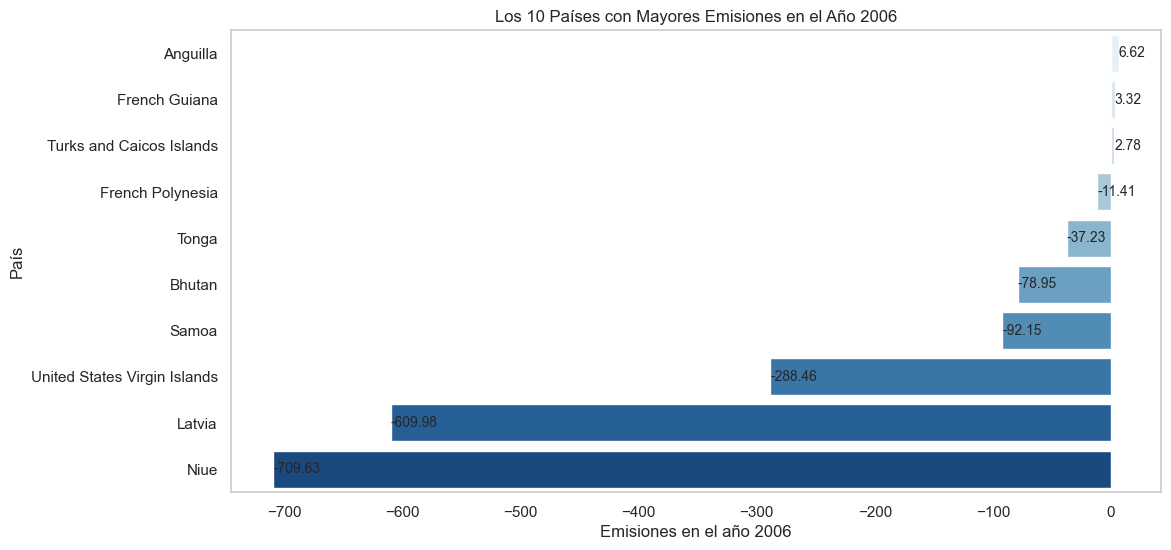

In [94]:
data_2006 = data[data['Year'] == 2006]

# Ordenar los datos por las emisiones en el año 2006
top_10_emitters_2006 = data_2006.sort_values(by='Emissions', ascending=False).tail(10)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = plt.gca()
sns.barplot(data=top_10_emitters_2006, x='Emissions', y='Entity', palette='Blues')
plt.xlabel('Emisiones en el año 2006')
plt.ylabel('País')
plt.title('Los 10 Países con Mayores Emisiones en el Año 2006')
plt.grid(axis='x')

# Mostramos los valores en las barras
for i, emission in enumerate(top_10_emitters_2006['Emissions']):
    ax.text(emission, i, f'{emission:.2f}', ha='left', va='center', fontsize=10)

plt.show()

Los resultados de nuestra segunda visualización, que se centra en el año 2006 como el punto más destacado en términos de emisiones, revelan una continuidad en la tendencia observada en nuestra visualización anterior. Una vez más, el país que encabeza la lista de los 10 principales contribuyentes en ese año crítico es Serbia y Montenegro, sin embargo es importante notar que al mostrar el promedio de emisiones a lo largo de 15 años, vemos a este país liderando con un valor promedio de 12,000 unidades en términos de emisiones, sin embargo cuando hacemos el mismo procedimiento para el año 2006, vemos que el valor es de 300,000 unidades. Esto nos indica a simple vista que este país tuve un pico extremadamente pronunciado en este año, pero para verlo de mejor manera, veamoslo en una gráfica de lineas.

C:\Users\Cristian Aguirre\AppData\Local\Temp\ipykernel_2680\3338787722.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


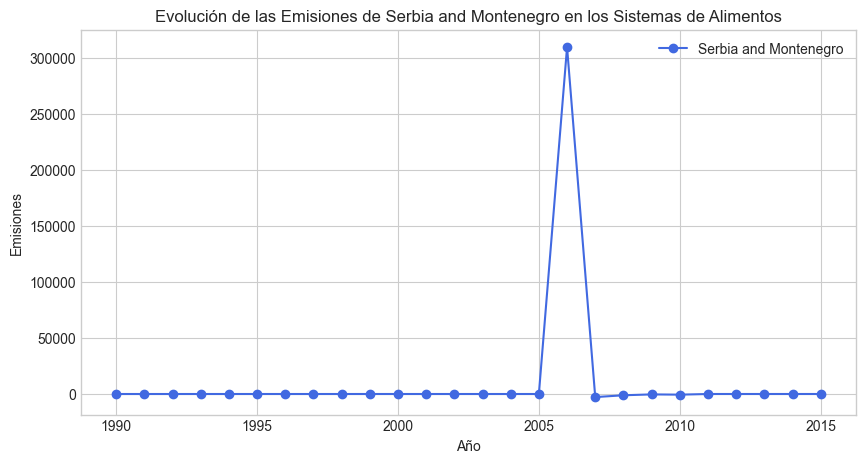

In [89]:
# Filtra los datos para un país específico (por ejemplo, Serbia and Montenegro)
country = 'Serbia and Montenegro'
data_country = data[data['Entity'] == country]

# Utilizar un estilo de Seaborn
plt.style.use('seaborn-whitegrid')

# Crear una figura y un eje
plt.figure(figsize=(10, 5))
ax = plt.gca()

# Dibujar una línea suavizada
plt.plot(data_country['Year'], data_country['Emissions'], marker='o', label=country, color='royalblue')

# Personalizar la gráfica
plt.xlabel('Año')
plt.ylabel('Emisiones')
plt.title(f'Evolución de las Emisiones de {country} en los Sistemas de Alimentos')
plt.grid(True)


# Mostrar la leyenda y la gráfica
plt.legend()
plt.show()


Tal y como lo intuimos anteoriormente, vemos un pico totalmente evidente en la tendencia de emisiones de Serbia y Montenegro, esta continuidad en el liderazgo de este pais en las emisiones de gases de efecto invernadero en 2006. Según un informe del Banco Mundial, el período previo a la desintegración de Serbia y Montenegro en 2006 estuvo marcado por cambios significativos en la economía y la industria en la región. La descomposición de la antigua Yugoslavia y la transición hacia economías independientes trajeron consigo un aumento en la producción industrial y un consumo de energía más intensivo, lo que resultó en emisiones sustancialmente más altas.

## Importancia de las regulaciones ambientales

Además, la falta de regulaciones ambientales y la adaptación lenta a prácticas más sostenibles contribuyeron al aumento de las emisiones en la región. A medida que Serbia y Montenegro avanzaron hacia una economía de mercado, la demanda de energía y la expansión industrial se convirtieron en impulsos significativos detrás del aumento en las emisiones.

Fuentes:
Banco Mundial. (2011). "Serbia and Montenegro - Air quality management in urban areas of Serbia: a policy note." Enla

## Ahora veamos la parte positiva

En el contexto global de emisiones de gases de efecto invernadero, se destacan cinco principales potencias en cada una de las regiones clave. En Europa, <span style="color: lightgreen;">**Alemania, el Reino Unido, Francia, Italia y España**</span> lideran las emisiones. En el continente americano, <span style="color: skyblue;">**Estados Unidos, Canadá, Brasil, México y Argentina**</span> juegan un papel destacado. Mientras tanto, en Asia, <span style="color: orange;">**China, India, Rusia, Japón**</span> y <span style="color: orange;">**Corea del Sur**</span> lideran el panorama de emisiones. Estos países han asumido una influencia significativa en sus respectivas regiones y están comprometidos con la adopción de medidas para abordar el cambio climático y reducir su impacto ambiental.
Fuentes:

* Agencia Europea de Medio Ambiente. (2022). Greenhouse gas emissions by European country.
* Agencia de Protección Ambiental de los Estados Unidos. (2022). Inventory of U.S. Greenhouse Gas Emissions and Sinks: 1990-2019.
* Global Carbon Atlas. (2022). CO2 emissions: International.
* Organización de las Naciones Unidas. (2022). Paris Agreement.

<Figure size 1200x600 with 0 Axes>

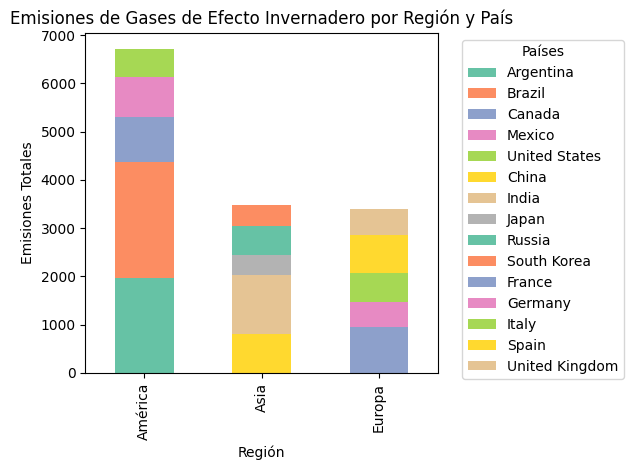

In [85]:
data_copy = data.copy()

# Creamos un diccionario que asocie cada país con su región
region_mapping = {
    'Germany': 'Europa',
    'United Kingdom': 'Europa',
    'France': 'Europa',
    'Italy': 'Europa',
    'Spain': 'Europa',
    'United States': 'América',
    'Canada': 'América',
    'Brazil': 'América',
    'Mexico': 'América',
    'Argentina': 'América',
    'China': 'Asia',
    'India': 'Asia',
    'Russia': 'Asia',
    'Japan': 'Asia',
    'South Korea': 'Asia',
}

data_copy['Region'] = data['Entity'].map(region_mapping)

# Agrupamos los datos por región y país y suma las emisiones
emissions_by_region = data_copy.groupby(['Region', 'Entity'])['Emissions'].sum().unstack()

sns.set_palette("Set2")
plt.figure(figsize=(12, 6))
ax = emissions_by_region.plot(kind='bar', stacked=True)
plt.xlabel('Región')
plt.ylabel('Emisiones Totales')
plt.title('Emisiones de Gases de Efecto Invernadero por Región y País')
plt.legend(title='Países', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<span style="color: lightgreen;">**AGREGAR ANALISIS AQUI**</span>

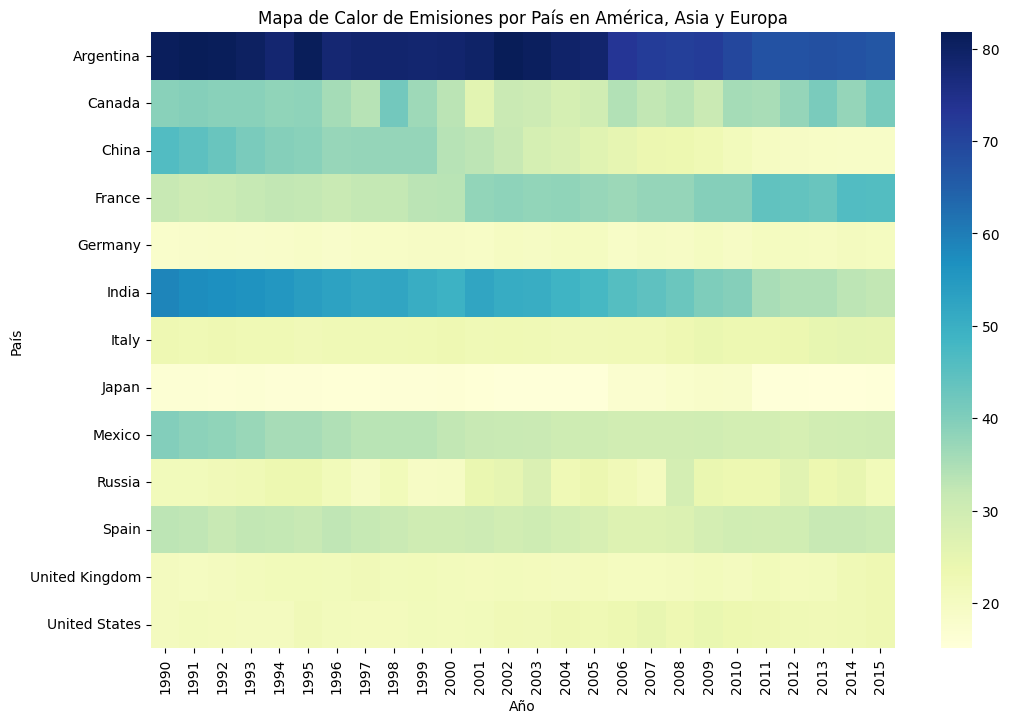

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de los cinco países lideres de América
paises_america = ['United States', 'Canada', 'Brasil', 'Mexico', 'Argentina']
paises_asia = ['China', 'India', 'Russia', 'Japan', 'Korea, South']
paises_europa = ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain']

# Filtrar los datos para los países de América, Asia y Europa
data_regions = data_copy[data_copy['Entity'].isin(paises_america + paises_asia + paises_europa)]

pivot_data = data_regions.pivot_table(values='Emissions', index='Entity', columns='Year', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlGnBu')
plt.xlabel('Año')
plt.ylabel('País')
plt.title('Mapa de Calor de Emisiones por País en América, Asia y Europa')
plt.show()


Ahora en nuestro análisis, compararemos los valores de emisiones de Guatemala con los de estos países líderes de América Latina. Esto nos permitirá evaluar el progreso de Guatemala en la mitigación de las emisiones y proporcionará información valiosa sobre cómo nuestro país se posiciona en la región en términos de sostenibilidad y acción climática.


<span style="color: lightgreen;">**AGREGAR MAS ANALISIS AQUI**</span>

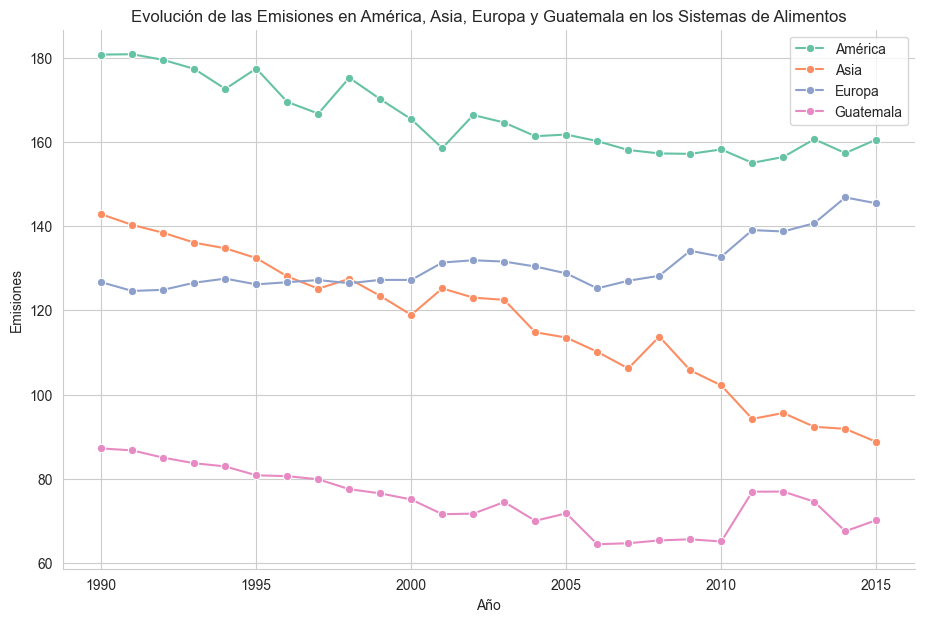

In [86]:
# Filtramos los datos para los países de América, Asia, Europa y Guatemala
data_america = data_copy[data_copy['Entity'].isin(paises_america)]
data_asia = data_copy[data_copy['Entity'].isin(paises_asia)]
data_europa = data_copy[data_copy['Entity'].isin(paises_europa)]
data_guatemala = data_copy[data_copy['Entity'] == 'Guatemala']

# Agrupamos los datos por año y suma las emisiones de las regiones
emissions_america = data_america.groupby('Year')['Emissions'].sum()
emissions_asia = data_asia.groupby('Year')['Emissions'].sum()
emissions_europa = data_europa.groupby('Year')['Emissions'].sum()
emissions_guatemala = data_guatemala.groupby('Year')['Emissions'].sum()

sns.set_style('whitegrid')
plt.figure(figsize=(11, 7))
ax = plt.gca()
sns.lineplot(data=emissions_america, label='América', ax=ax, marker='o')
sns.lineplot(data=emissions_asia, label='Asia', ax=ax, marker='o')
sns.lineplot(data=emissions_europa, label='Europa', ax=ax, marker='o')
sns.lineplot(data=emissions_guatemala, label='Guatemala', ax=ax, marker='o')
plt.xlabel('Año')
plt.ylabel('Emisiones')
plt.title('Evolución de las Emisiones en América, Asia, Europa y Guatemala en los Sistemas de Alimentos')
plt.legend(loc='upper right')
sns.despine()
plt.grid(True)

plt.show()

## Reflexion

**1. ¿Qué experiencias individuales han tenido los miembros de su grupo?**

<span style="color: lightgreen;">**AGREGAR RESPUESTA AQUI**</span>

**2. Comenten sobre la importancia de la ética en la visualización de datos, evitando visualizaciones engañosas o que lleven a interpretaciones erróneas. Pueden proporcionar casos notorios.**

La ética es imporatnte en el sector de data science al momento de realizar alguna visualización de datos por el simple hecho que tambien estamos buscando describir los datos obtenidos de forma precisa y con honestidad para brindar apoyo o conclusiones reales a los clientes. Esto nos presenta como profesionales que se preparan y evitan la interpretación errónea que puede llevar a una mala toma de decisiones de un negocio o utilizar de mala forma el capital importante del cliente. Es importante ser transparente en la forma y desde que datos estamos obteniendo los resultados para nuestras conclusiones pues de esta forma damos credibilidad al trabajo y respaldo de lo certeros que estamos del trabajo entregado. De igual forma es importante siempre tomar en cuenta la misma ética de manejar data sensible que el cliente nos está brindadndo acceso para poder realizar un análisis sin embargo debemos de respetar los derechos y prejuicios al momento de realizar el mismo.

Esto puede causar mucho revuelo y problemas no solo legales pero para la humanidad como tal pues un simple proceso mal hecho sin ética puede llevar a brindar información desacreditada o sin respaldo tal como lo hizo el mismo el senador James Inhofe el cual aseguraba con su data recabada y sus gráficos de esta misma data que el planeta no se encontraba en una crisis de calentamiento global. Esto acontece en la cumbre del calentamiento global en París donde asegura y demuestra con información recabada de forma no ética que el calentamiento global era falso, sin embargo poco tiempo después se demuestra la falta de ética en el proceso de visualización de datos pues la misma información era falsa.